<a href="https://colab.research.google.com/github/aceslima/python_api_scraping/blob/master/Dados_do_Yahoo_Finance_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 6.4 MB 18.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [69]:
import pandas as pd
import yfinance as yf

In [3]:
# Todas as informações sobre uma empresa
# Exemplo: ITUB4.SA (Itaú)
df = yf.Ticker('ITUB4.SA')

In [12]:
print("Setor: {}".format(df.get_info()['sector']))
print("Preço atual: {}".format(df.get_info()['currentPrice']))
print("Beta: {}".format(df.get_info()['beta']))

Setor: Financial Services
Preço atual: 27.48
Beta: 0.893939


In [19]:
# Lista de informações disponíveis
list(df.get_info().keys())[:10]

['zip',
 'sector',
 'fullTimeEmployees',
 'longBusinessSummary',
 'city',
 'phone',
 'state',
 'country',
 'companyOfficers',
 'website']

In [20]:
# Histórico de preços
df_hist = df.history(period='max')

In [25]:
df_hist.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-12-21,1.744810,1.852039,1.744605,1.834698,74224.0,0.0,0.0
2000-12-22,1.816229,1.816229,1.744401,1.755175,23312.0,0.0,0.0
2000-12-25,1.755175,1.755175,1.755175,1.755175,0.0,0.0,0.0


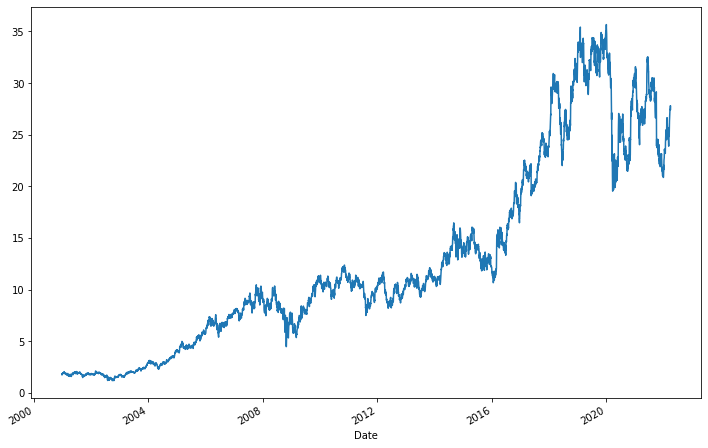

In [24]:
df_hist.Close.plot(figsize=(12,8));

In [27]:
# Retornando apenas o historico de preços
itau = yf.download('ITUB4.SA')

[*********************100%***********************]  1 of 1 completed


In [28]:
itau.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-21,2.815505,2.988535,2.815174,2.960552,1.834698,74224.0
2000-12-22,2.930748,2.930748,2.814843,2.832229,1.755175,23312.0
2000-12-25,2.832229,2.832229,2.832229,2.832229,1.755175,0.0


In [60]:
# Historico de várias ações
# A partir de 2010
dados = yf.download('ITUB4.SA BBDC4.SA BCSA34.SA BBAS3.SA BIDI11.SA', start='2010-01-01')

[*********************100%***********************]  5 of 5 completed


In [61]:
# 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'
dados.columns.levels[0]

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [62]:
dados.head(2)

Adj Close                                              Close  \
             BBAS3.SA   BBDC4.SA BCSA34.SA BIDI11.SA   ITUB4.SA BBAS3.SA   
Date                                                                       
2010-01-04  13.664701  10.310541       NaN       NaN  11.321158     29.9   
2010-01-05  13.527598  10.259446       NaN       NaN  11.394531     29.6   

                                                      ...       Open  \
             BBDC4.SA BCSA34.SA BIDI11.SA   ITUB4.SA  ...   BBAS3.SA   
Date                                                  ...              
2010-01-04  16.189041       NaN       NaN  18.268333  ...  29.799999   
2010-01-05  16.103159       NaN       NaN  18.386723  ...  30.100000   

                                                         Volume             \
             BBDC4.SA BCSA34.SA BIDI11.SA   ITUB4.SA   BBAS3.SA   BBDC4.SA   
Date                                                                         
2010-01-04  15.824037       NaN       NaN  17.708261  3624700.0  8387174.0   
2010-01-05  16.274925       NaN       NaN  18.313868  3064900.0  9888277.0   

                                            
           BCSA34.SA BIDI11.SA    ITUB4.SA  
Date                                        
2010-01-04       NaN       NaN  11843397.0  
2010-01-05       NaN       NaN   8593315.0  

[2 rows x 30 columns]

In [63]:
precos = dados['Close']

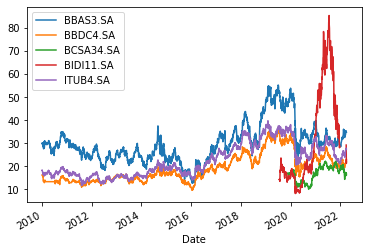

In [64]:
precos.plot()

In [65]:
# Normalização dos precos (z-score)
precos_norm = (precos - precos.mean())/precos.std()

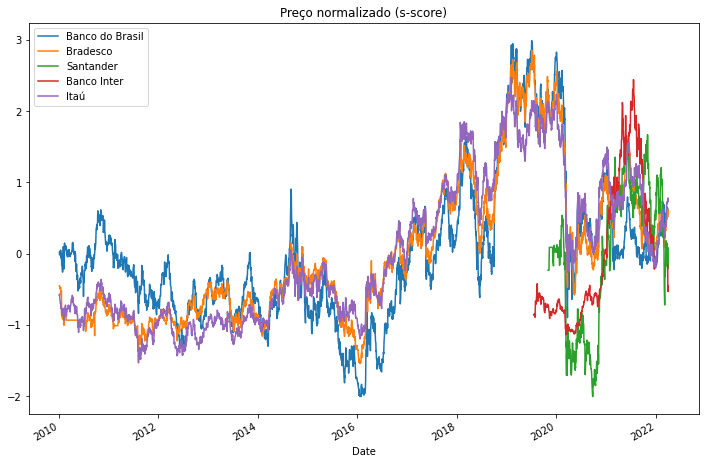

In [68]:
ax = precos_norm.plot(figsize=(12, 8), title='Preço normalizado (s-score)')
ax.legend(['Banco do Brasil', 'Bradesco', 'Santander', 'Banco Inter', 'Itaú']);

In [77]:
# Retorno acumulado
precos_rtn = precos[['BBAS3.SA', 'BBDC4.SA']].pct_change()

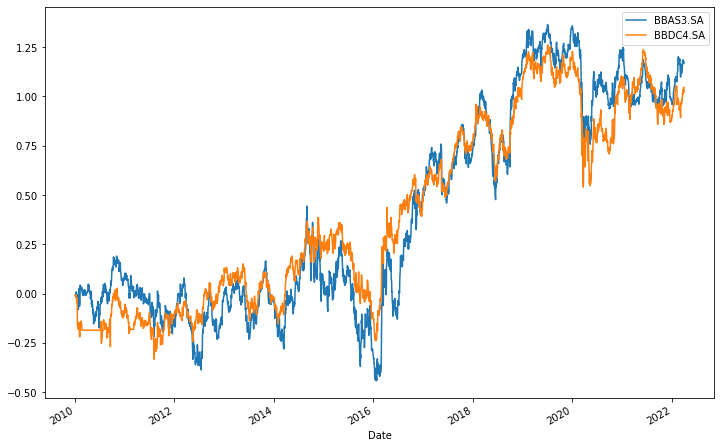

In [78]:
precos_rtn.cumsum().plot(figsize=(12,8))